In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import expm

Consider the continuous-time __Registration Line Markov Chain__ from Example 2.13 (Lecture 7).

1. Implement a simulation of this Markov chain on the time interval $[0,60]$. 

In [2]:
lambda_rate = 1/4 # students arrival rate
mu_rate = 1/5 # students service rate
end_time = 60 # time interval
state = 0 # the number of students in the line
t = 0 # time at each transition, intial at 0
time = [0] # a list to store every transition time
states = [0] # a list to store the number of students at the transition time

while t < end_time:
    T1 = np.random.exponential(1/lambda_rate)
    T2 = np.random.exponential(1/mu_rate)
    
    if t + min(T1, T2) > 60:
        break
    
    if T1 < T2:
        t += T1
        if state < 4:
            state += 1
    else:
        t += T2
        if state > 0:
            state -= 1
    
    time.append(t)
    states.append(state)

print(time)
print(states)

[0, 4.146884667930533, 4.307560881619954, 5.806095072507514, 7.896170789969743, 8.024955338650013, 8.468428509531625, 11.278815921663512, 11.63511573906746, 15.358637653332883, 15.482387769270657, 21.12220974864516, 21.160944754175695, 23.160394011589652, 31.954140505333882, 40.84692882014693, 41.15553596302835, 41.941100571973514, 43.36654212863345, 43.60427836438603, 45.270444845250594, 47.18097553378923, 47.41681847046771, 51.368184434268144, 52.14114812167111, 57.24064872656433, 57.27127918011537, 57.277341034097255]
[0, 1, 0, 1, 2, 1, 2, 3, 4, 4, 4, 4, 3, 2, 3, 2, 1, 2, 1, 2, 3, 2, 1, 0, 1, 2, 1, 0]


2. Plot a trajectory of this Markov Chain on $[0,60]$ by using your code from 1.

<i>Hint:</i> You can use the <tt>plt.hlines()</tt> command to plot horizontal lines (check also the documentation online).

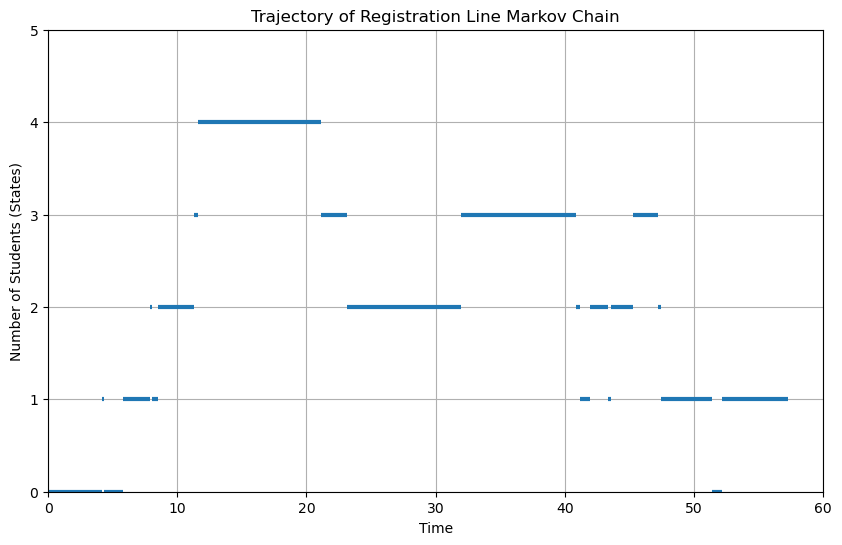

In [5]:
plt.figure(figsize=(10, 6))
for s in range(len(states)-1):
    plt.hlines(y=states[s], xmin=time[s], xmax=time[s+1],linewidth=3.0)
plt.xlabel('Time')
plt.ylabel('Number of Students (States)')
plt.title('Trajectory of Registration Line Markov Chain')
plt.xlim(0,60)
plt.ylim(0,5)
plt.grid(True)

3. Compute the transition function $P(t)$ at $t = \pi$.

*Hint:* Use a suitable function from the <tt>scipy.linalg</tt> package (check also the documentation online).

For a continuous-time Markov Chain, the transition function P(t) can be computed by the equation: 

$$ P(t) = e^{tQ} $$

We can use the expm from scipy.linalg to compute the matrix exponential.

In [6]:
# Create the generator matrix we got in class
Q_rg = np.array([[-1/4, 1/4, 0, 0, 0], [1/5, -9/20, 1/4, 0, 0], [0, 1/5, -9/20, 1/4, 0], [0, 0, 1/5, -9/20, 1/4],
        [0, 0, 0, 1/5, -1/5]])

def get_transition_function(Q):
    tran_func = expm(math.pi * Q)
    return tran_func
# the expm from scipy.linalg can compute the matrix exponential

P = get_transition_function(Q_rg)
P

array([[0.55524989, 0.308565  , 0.10512926, 0.02554735, 0.00550851],
       [0.246852  , 0.3925013 , 0.24489947, 0.08909819, 0.02664905],
       [0.06728272, 0.19591958, 0.37967644, 0.24578083, 0.11134043],
       [0.01308024, 0.05702284, 0.19662467, 0.39747023, 0.33580202],
       [0.00225628, 0.01364431, 0.07125787, 0.26864162, 0.64419991]])

4. Compute the stationary distribution of this continuous-time Markov chain.

*Hint:* Use suitable functions from the <tt>numpy.linalg package</tt> (check also the documentation online).

We can use the formula
$$ \pi^{T} Q = 0$$ and $$\sum_{i=1}^n \pi_{i} = 1$$ to find the stationary distribution

In [7]:
def get_stationary_distribution(Q):
    dim = Q.shape[0] # set the size of the matrix
    QT = np.transpose(Q) # transpose generator matrix
    QT_1 = np.vstack((QT[:-1], np.ones(dim))) # add one row of all 1s
    V = np.vstack((np.zeros((dim - 1, 1)), [1]))
    PI = np.linalg.solve(QT_1, V) # solve for stationary distribution
    return np.transpose(PI) # return stationary distribution

S = get_stationary_distribution(Q_rg)
S

array([[0.12184674, 0.15230842, 0.19038553, 0.23798191, 0.29747739]])

Multistate Markov models are used in medicine to model the course of diseases. A patient may advance into, or recover from, successively more severe stages of a disease until some terminal state. Each stage represents a state of an absorbing continuous-time Markov chain. 

Bartolomeo et al. (2011) develop such a model to study the progression of liver disease among patients diagnosed with cirrhosis of the liver. The general form of the infinitesimal generator matrix $Q$ for their three-parameter model is

$$ Q = \begin{pmatrix} -(q_{12} + q_{13}) & q_{12} & q_{13} \\ 0 & -q_{23} & q_{23} \\ 0 & 0 & 0 \end{pmatrix}  $$

where state 1 represents cirrhosis, state 2 denotes liver cancer, and state 3 is death.

1. Starting from the first stage ("cirrhosis"), estimate the mean time to death (i.e. ending up in stage 3) by running 100,000 simulations. Use the transition rates

$$ q_{12} = 0.0151, \quad q_{13} = 0.0071, \quad q_{23} = 0.0284.$$

In [8]:
trials = 100000
simulations = [] # list to store all simulations
initial_state = 1 # initial state starting from cirrhosis

q12_rate = 0.0151
q13_rate = 0.0071
q23_rate = 0.0284

for i in range(trials):
    state = initial_state
    t = 0
    while True:
        if state == 1:
            q12 = np.random.exponential(1/q12_rate)
            q13 = np.random.exponential(1/q13_rate)
            if q12 < q13:
                t += q12
                state = 2
            else:
                t += q13
                break  # transition to death
                
        if state == 2:
            q23 = np.random.exponential(1/q23_rate)
            t += q23
            break  # transition to death
    simulations.append(t)
    
meantime_to_death = sum(simulations) / trials # calculate the mean time to death
meantime_to_death

69.03314893075621

2. Compare your approximation from 1. with the exact theoretical mean time to death (implement a suitable formula from class).  

$$
Q = 
\begin{pmatrix}
-(0.0151+0.0071) & 0.0151 & 0.0071 \\
0 & -0.0284 & 0.0284 \\
0 & 0 & 0
\end{pmatrix}
$$

Using the formula to compute starting from cirrhosis, the exact theoretical mean time to death is:

$$ 
\frac{1}{q_{12}+q_{13}} + \frac{q_{12}}{q_{23}(q_{12}+q_{13})} = \frac{1}{0.0151+0.0071} + \frac{0.0151}
{0.0284(0.0151+0.0071)} = 68.9950513894 
$$

As we can see, the expected time to death of 100,000 simulations is pretty close to the theoretical mean time to death. 